Projekt praktyczny - Regresja

# Pobranie i wczytanie danych
 Ze strony SDA pobieramy zestaw danych w pliku .csv dla których przeprowadzimy analizę.

## Import bibliotek

W pierwszej kolejności dokonujemy importu niezbędnych bibliotek.

In [1]:
import pandas as pd  # Data manipulation
import numpy as np  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Visualization

## Wczytanie danych

In [2]:
weather_df = pd.read_csv('weatherHistory.csv')
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Czego dotyczą dane oraz krótka analiza
Dane zawierają informację pogodowe z miasta Segedyn w Węgrzech z lat 2006-2016.

W danych znajdziemy informację:
- date - zawiera sformatowanę datę, dane pogodowe zostały zebrane w latach 2006-2016 dla pomiarów wykonywanych co godzinę
- summary - zawiera krótką informację o stanie pogody danego dnia (Partly Cloudy, Mostly Cloudy, Overcast, Foggy, Breezy and Mostly Cloudy, Clear, Breezy and Partly Cloudy, Breezy and Overcast, Humid and Mostly Cloudy, Humid and Partly Cloudy, Windy and Foggy, Windy and Overcast, Breezy and Foggy, Windy and Partly Cloudy, Breezy, Dry and Partly Cloudy, Windy and Mostly Cloudy, Dangerously Windy and Partly Cloudy, Dry, Windy, Humid and Overcast, Light Rain, Drizzle, Windy and Dry, Dry and Mostly Cloudy, Breezy and Dry, Rain)
- precip type - zawiera informację o opadach i rodzaju opadów, czy padał deszcz, czy śnieg (rain, snow)
- temperature (C) - zwiera pomiary temperatury wyrażone w stopniach Celsjusza
- apparent temperature - zawiera pomiary wyliczonej temperatury odczuwalnej wyrażone w stopniach Celsjusza
- humidity - zawiera informację o wilgotności danego dnia
- loud cover- zawiera informację o parametrze niskiego zachmurzenia przyjmującego wartości w przedziale od 0 do 1. 
- pressure (millibars) - zawiera pomiary ciśnienia wyrażonego w milibarach.
- daily summary - zawiera krótkie podsumowanie pogody w danym czasie.

# Przygotowanie i eksploracja danych

## Sprawdzenie danych 


Po wczytaniu danych sparawdzamy z jakim typem danych mamy doczynienia. 

In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


## Braki w danych

In [4]:
weather_df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [5]:
weather_df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

W parametrze precic type zaobsorwaliśmy brak 517 wartości.

Precic type informuje nas czy w danym dniu były opady deszczu, bądź śniegu. Zatem w tym przypadku  brak danych inforumje nas o tym, że w tym dniu nie zaobersowano żadnych odpadów.
Brak danych Nan zastępujemy wartością numeryczną 0.

In [6]:
weather_df['Precip Type'] = weather_df['Precip Type'].replace(np.nan, 0)
weather_df['Precip Type'].unique()

array(['rain', 'snow', 0], dtype=object)

## Wartości odstające

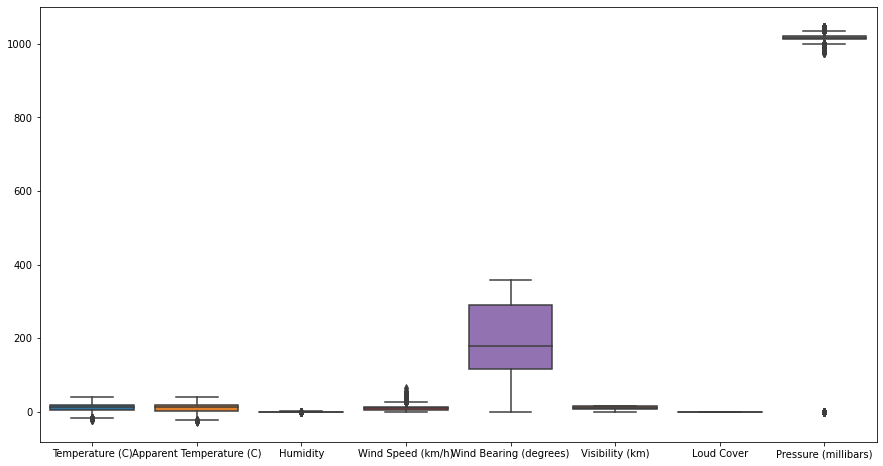

In [7]:
sns.boxplot(data=weather_df)
plt.gcf().set_size_inches(15, 8)

W pressure występuje silnie odstająca wartość ciśnienia 0. Zakładamy, że wynika ona z błędnie wprowadzonej wartości, zatem tą wartość zamieniamy średnią wartością ciśnienia wyliczoną dla wszystkich pomairów.

In [8]:
# from sklearn.impute import SimpleImputer
# weather_df['Pressure (millibars)'] = SimpleImputer(missing_values=0, strategy='mean')

weather_df['Pressure (millibars)']= weather_df['Pressure (millibars)'].replace(0, 1003.235956)


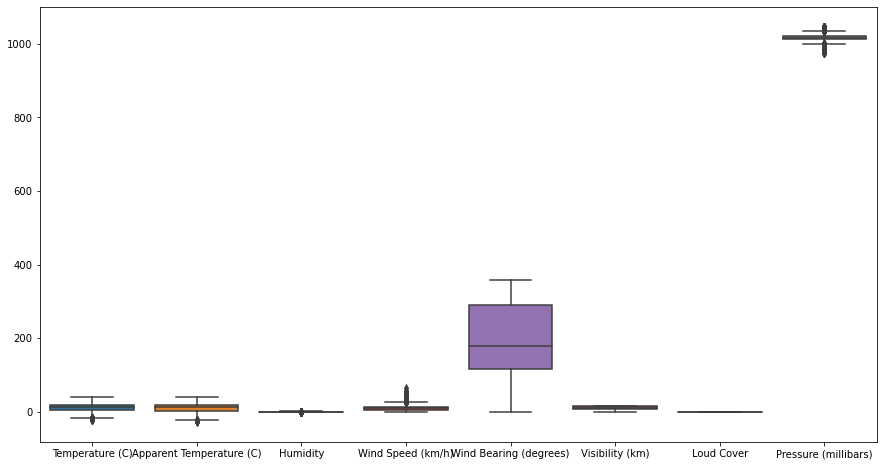

In [9]:
sns.boxplot(data=weather_df)
plt.gcf().set_size_inches(15, 8)

## Wartośći unikalne 

In [10]:
weather_df.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     3
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [11]:
weather_df['Loud Cover'].unique()

array([0.])

Kolumna Loud Cover zawiera tylko jedną wartość 0 dla wszytskich pomiarów. Zatem nie wniesie ona znaczących informacji do dalszej analizy i możemy się jej pozbyć.

In [12]:
weather_df = weather_df.drop(['Loud Cover'], axis=1)
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


##  Transformacja zmiennych kategorialnych 


In [13]:
weather_df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

W tym kroku dokonujemy transformacji zmiennych kategorialych:
- summary
- precip type.

In [14]:
weather_df['Summary'] = weather_df['Summary'].astype("category")

In [15]:
weather_df['Precip Type'] = weather_df['Precip Type'].astype("category")

In [16]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Formatted Date            96453 non-null  object  
 1   Summary                   96453 non-null  category
 2   Precip Type               96453 non-null  category
 3   Temperature (C)           96453 non-null  float64 
 4   Apparent Temperature (C)  96453 non-null  float64 
 5   Humidity                  96453 non-null  float64 
 6   Wind Speed (km/h)         96453 non-null  float64 
 7   Wind Bearing (degrees)    96453 non-null  float64 
 8   Visibility (km)           96453 non-null  float64 
 9   Pressure (millibars)      96453 non-null  float64 
 10  Daily Summary             96453 non-null  object  
dtypes: category(2), float64(7), object(2)
memory usage: 6.8+ MB


## Zamiana indeksu

W tym kroku dokonujemy zmiany indeksu z liczby porządkowej na  datę.

In [17]:
weather_df.set_index('Formatted Date', inplace=True)

# pd.datetime

In [18]:
weather_df.head(3)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.


# Statystyka na zbiorze danych 

Wyświetlona poniżej tabela zawiera podstawowe informacje statystyczne takie jak: średnia, odchylenie standardowe, wartości minimalne i maksylane, dolny kwartyl, mediane, górny kwartyl. 

Dzięki temu jesteśmy w stanie przeprowadzić podstawową analizę statystyczną umożliwiającą między innymi wyłapanie wartości odstających.

In [19]:
weather_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1016.632822
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,7.881878
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,973.780000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


Nastepnie badamy korelację dannych. 
Współczynnik korelacji przyjmuje wartości z przedziału [-1,1]. Koleracja dodatnia mówi nam, że wraz ze wzrtostem wartości jednej cechy następuje wzrost wartości drugiej cechy. Natomiast korelacja ujemna następuje wtedy, gdy przy wzroście jednej cechy, wartość drugiej maleje. 
Przy wartości korelacji 0 wartości nie są ze sobą skorelowane.

In [20]:
corr= weather_df.corr()
corr

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.299165
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.276830
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.038817
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.252731
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.077918
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,-0.147713
Pressure (millibars),-0.299165,-0.276830,0.038817,-0.252731,-0.077918,-0.147713,1.000000


W następnym kroku tworzymy heatmap, która w sposób graficzny pokazuje które parametry są ze sobą skorelowane.

<AxesSubplot:>

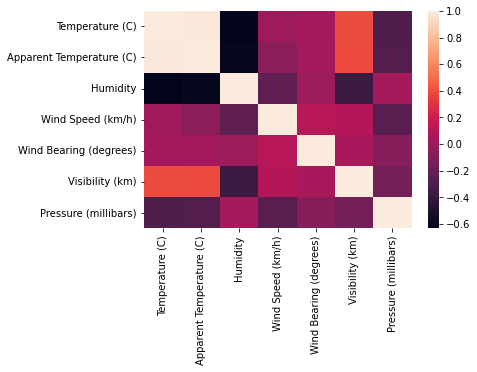

In [21]:
sns.heatmap(corr)

W tak powstałej heatmapie widzimy, że bardzo silnie jest ze sobą skorelowana dodatnio temperatura z temperaturą odczuwalną. Na poziomie 0.4 skorelowane dodatnio są ze sobą temperatura z widocznością oraz temperatura odczuwalna z widocznością.
Silna korelacja ujemna jest dla temperatury/ temperatury odczuwalnej i wilgotności .

#  Preprocessing

Używanie danych kategorialnych w wielu modelach regresji to skuteczna metoda włączania nienumerycznych typów danych do modelu regresji. Dane kategoryczne odnoszą się do wartości danych, które reprezentują kategorie - wartości danych ze stałą i nieuporządkowaną liczbą wartości, na przykład płeć (mężczyzna/kobieta) lub pora roku (lato/winder/wiosna/jesień). W modelu regresji wartości te mogą być reprezentowane przez zmienne fikcyjne - zmienne zawierające wartości takie jak 1 lub 0 reprezentujące obecność lub brak wartości kategorycznej.
Uwzględniając zmienną fikcyjną w modelu regresji, należy jednak uważać na dummy variable trap. Dummy variable trap to scenariusz, w którym zmienne niezależne są współliniowe — scenariusz, w którym dwie lub więcej zmiennych jest silnie skorelowanych; w uproszczeniu jedną zmienną można przewidzieć na podstawie pozostałych.

In [22]:
# Dummy variable

categorical_columns_ls = weather_df.select_dtypes(
    ["object", "category"]
).columns.to_list()

weather_encoded_df = pd.get_dummies(
    data=weather_df,
    prefix_sep="_",
    columns=categorical_columns_ls,
    drop_first=True,
    dtype="int8",
)

W naszym przypadku zmiennymi kategorycznymi są summary, precip type oraz daily summary.

In [23]:
categorical_columns_ls

['Summary', 'Precip Type', 'Daily Summary']

In [24]:
print(f"Kolumny w oryginalnej ramce danych: {weather_df.columns.values}")
print(f"Liczba wierszy i kolumn w oryginalnej ramce danych: {weather_df.shape}")

print(f"Kolumny w ramce danych po transformacji: {weather_encoded_df.columns.values}")
print(f"Liczba wierszy i kolumn po transformacji: {weather_encoded_df.shape}")

Kolumny w oryginalnej ramce danych: ['Summary' 'Precip Type' 'Temperature (C)' 'Apparent Temperature (C)'
 'Humidity' 'Wind Speed (km/h)' 'Wind Bearing (degrees)' 'Visibility (km)'
 'Pressure (millibars)' 'Daily Summary']
Liczba wierszy i kolumn w oryginalnej ramce danych: (96453, 10)
Kolumny w ramce danych po transformacji: ['Temperature (C)' 'Apparent Temperature (C)' 'Humidity'
 'Wind Speed (km/h)' 'Wind Bearing (degrees)' 'Visibility (km)'
 'Pressure (millibars)' 'Summary_Breezy and Dry'
 'Summary_Breezy and Foggy' 'Summary_Breezy and Mostly Cloudy'
 'Summary_Breezy and Overcast' 'Summary_Breezy and Partly Cloudy'
 'Summary_Clear' 'Summary_Dangerously Windy and Partly Cloudy'
 'Summary_Drizzle' 'Summary_Dry' 'Summary_Dry and Mostly Cloudy'
 'Summary_Dry and Partly Cloudy' 'Summary_Foggy'
 'Summary_Humid and Mostly Cloudy' 'Summary_Humid and Overcast'
 'Summary_Humid and Partly Cloudy' 'Summary_Light Rain'
 'Summary_Mostly Cloudy' 'Summary_Overcast' 'Summary_Partly Cloudy'
 'Summary

In [25]:
weather_df.head(3)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.


In [26]:
weather_encoded_df.head(3)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,...,Daily Summary_Partly cloudy until evening.,Daily Summary_Partly cloudy until morning.,Daily Summary_Partly cloudy until night and breezy in the afternoon.,Daily Summary_Partly cloudy until night and breezy in the morning.,Daily Summary_Partly cloudy until night and breezy starting in the morning continuing until afternoon.,Daily Summary_Partly cloudy until night.,Daily Summary_Rain throughout the day.,Daily Summary_Rain until afternoon.,Daily Summary_Rain until morning.,Daily Summary_Windy in the afternoon.
Formatted Date,,,,,,,,,,,,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Statystka

Dla wartości kategorycznych dokonujemy analizy statystycznej testem chi-kwadrat.

Jest to test na niezależność różnych kategorii populacji. Test ma sens tylko wtedy, gdy obserwowany wymiar wynosi dwa lub więcej. Zastosowanie testu do tabeli jednowymiarowej zawsze da w wyniku oczekiwaną równą obserwowaną i statystykę chi-kwadrat równą 0.

Hipotezy testu chi-kwadrat są następujące:

𝐻0  (Null Hypothesis, hipoteza zerowa) — 2 zmienne kategorialne są od siebie niezależne.
𝐻𝐴  (Alternate Hypothesis, hipoteza alternatywna) — 2 zmienne kategorialne są od siebie zależne.

Zakładając 5% poziom istotności:

p_value < 0.05 — mamy podstawy do przyjęcia  𝐻𝐴 , więc to oznacza, że dwie zmienne kategorialne są ze sobą skorelowane.
p_value > 0.05 — nie mamy podstaw do odrzucenia  𝐻0 , więc to oznaczna, że dwie zmienne kategorialne nie są ze soba skorelowane.

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency

p_values = {}
for i in categorical_columns_ls:
    for j in range(len(categorical_columns_ls)):
        _, p, _, _ = chi2_contingency(
            pd.crosstab(weather_df[i], weather_df[categorical_columns_ls[j]])
        )
        p_values[f"{i}:{categorical_columns_ls[j]}"] = p
        print(f"{i} z {categorical_columns_ls[j]}: {p}")

Summary z Summary: 0.0
Summary z Precip Type: 0.0
Summary z Daily Summary: 0.0
Precip Type z Summary: 0.0
Precip Type z Precip Type: 0.0
Precip Type z Daily Summary: 0.0
Daily Summary z Summary: 0.0
Daily Summary z Precip Type: 0.0
Daily Summary z Daily Summary: 0.0


In [28]:
for key, value in p_values.items():
    if value<0.05:
        print (key, value)

Summary:Summary 0.0
Summary:Precip Type 0.0
Summary:Daily Summary 0.0
Precip Type:Summary 0.0
Precip Type:Precip Type 0.0
Precip Type:Daily Summary 0.0
Daily Summary:Summary 0.0
Daily Summary:Precip Type 0.0
Daily Summary:Daily Summary 0.0


Uzyskane  przez nasz wartości wskazują, że summary, precip type oraz summary daily są zależny. Zatem w trakcje dalszej analizy pozostawimy tylko jedną zmieną kategoryczną precip type.

In [29]:
weather_df['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [30]:
weather_df = weather_df.drop(['Summary'], axis=1)
weather_df = weather_df.drop(['Daily Summary'], axis=1)
weather_df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,,
2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


# Podział danych na zbiór treningowy i testowy

Zbiór dnaych dzielimy na dane testowe i treningowe. Zbiór testowy obejmuje 20% danych, a zbiór treningowy 80% dannych.

In [31]:
from sklearn.model_selection import train_test_split
X = weather_df.drop('Temperature (C)', axis=1)
y = weather_df['Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (77162, 7)
X_test dimension=  (19291, 7)
y_train dimension=  (77162,)
y_test dimension=  (19291,)


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


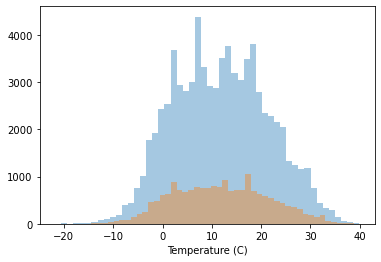

In [32]:
fig, ax = plt.subplots()
for a in [y_train, y_test]:
    sns.distplot(a, ax=ax, kde=False)

# Badanie współliniowości

Tworzymy heatmapę dla danych treningowych.

<AxesSubplot:>

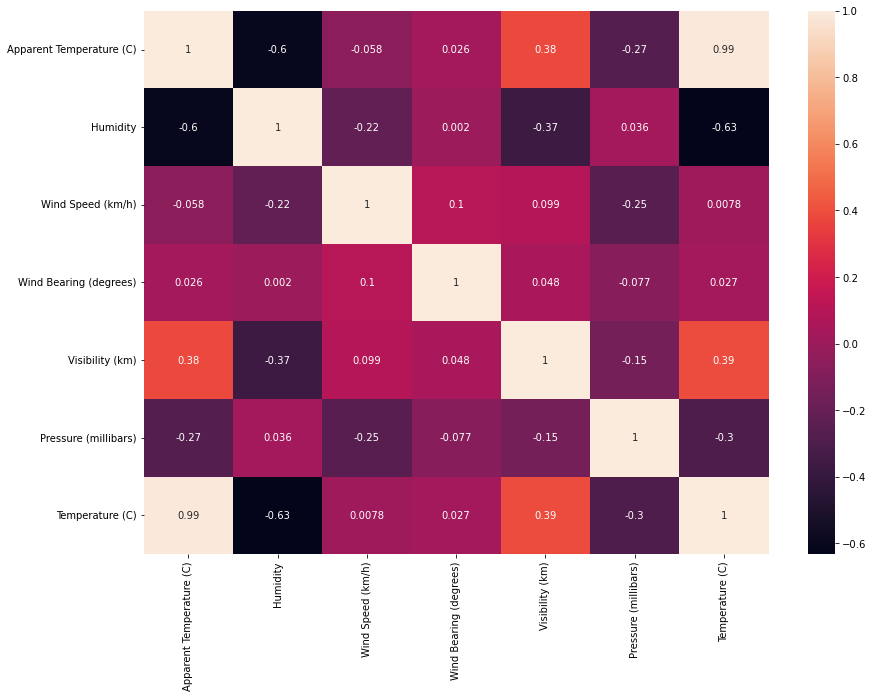

In [33]:
plt.rcParams["figure.figsize"] = [14, 10]

sns.heatmap(X_train.join(y_train).corr(), annot=True)

Bardzo silnie jest ze sobą skorelowana dodatnio temperatura z temperaturą odczuwalną. Na poziomie 0.4 skorelowane dodatnio są ze sobą temperatura z widocznością oraz temperatura odczuwalna z widocznością. Silna korelacja ujemna jest dla temperatury/ temperatury odczuwalnej i wilgotności .

In [34]:
X_train_m = X_train[['Apparent Temperature (C)', 'Humidity']]
X_test_m = X_test[['Apparent Temperature (C)', 'Humidity']]
X_train_m.columns = ['Apparent_Temperature', 'Humidity']

In [35]:
X_train_m.join(y_train)[:1000]

,Apparent_Temperature,Humidity,Temperature (C)
Formatted Date,,,
2006-01-01 00:00:00.000 +0100,-4.050000,0.89,0.577778
2006-01-01 01:00:00.000 +0100,-3.238889,0.85,1.161111
2006-01-01 02:00:00.000 +0100,-3.155556,0.82,1.666667
2006-01-01 03:00:00.000 +0100,-2.194444,0.82,1.711111
2006-01-01 04:00:00.000 +0100,-2.744444,0.86,1.183333
...,...,...,...
2006-02-23 07:00:00.000 +0100,-0.100000,0.87,-0.100000
2006-02-23 08:00:00.000 +0100,0.027778,0.86,0.027778
2006-02-23 09:00:00.000 +0100,2.200000,0.79,2.200000


# Model regresji liniowej

In [36]:
X_train_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77162 entries, 2010-09-18 01:00:00.000 +0200 to 2007-11-26 04:00:00.000 +0100
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Apparent_Temperature  77162 non-null  float64
 1   Humidity              77162 non-null  float64
dtypes: float64(2)
memory usage: 3.8+ MB


Korzystając z biblioteki sklearn.linear_model importujemy LinearRegression. Następnie sprawdzamy współczynniki theta.

In [37]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train_m, y_train)


sk_theta_ls = [lin_reg.intercept_] + list(lin_reg.coef_)
parameter_ls = ["theta_" + str(i) for i in range(X_train_m.shape[1] + 1)]
columns_ls = ["intersect:x_0=1"] + list(X_train_m.columns.values)
parameter_df = pd.DataFrame({"Parameter": parameter_ls, "Columns": columns_ls})
parameter_df["Sklearn_theta"] = sk_theta_ls

parameter_df

,Parameter,Columns,Sklearn_theta
0,theta_0,intersect:x_0=1,4.542303
1,theta_1,Apparent_Temperature,0.857595
2,theta_2,Humidity,-2.613256


In [38]:
from statsmodels.api import OLS
import statsmodels.api as sm

X_train_m_statsmodels = sm.add_constant(X_train_m)
print(OLS(y_train, X_train_m_statsmodels).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.949e+06
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:56:42   Log-Likelihood:            -1.1571e+05
No. Observations:               77162   AIC:                         2.314e+05
Df Residuals:                   77159   BIC:                         2.315e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.5423 

Dokoknujemy analizy statystycznej dla stworzonego modelu. 
Współczynki theta pokazują nachylenie prostej regresji, zgodnie z przewidaniami w  przypadku apparent temperatury współczynnik jest dodatni, zatem linia regresji rośnie. W przypadku humidity współczynnik jesy ujemny, zatem linia regreji maleje. Dopasowanie lini regresji jest bardzo dobre w przypadku apparent  temperature (0%) dla humidity odchylenie błąd pomiaru wynosi około 1%. 

# Predykcje

In [39]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    # mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print("explained_variance: ", round(explained_variance, 4))
    # print("mean_squared_log_error: ", round(mean_squared_log_error, 4))
    print("r2: ", round(r2, 4))
    print("MAE: ", round(mean_absolute_error, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))

y_train_pred = lin_reg.predict(X_train_m)
y_test_pred = lin_reg.predict(X_test_m)

D:\anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Apparent Temperature (C)
Feature names seen at fit time, yet now missing:
- Apparent_Temperature

  warnings.warn(message, FutureWarning)


In [40]:
y_train_pred

array([15.27389848,  3.76336323, 17.64903322, ...,  9.04334416,
       18.83191525,  4.33436143])

In [41]:
y_test_pred

array([27.87984905,  9.22453558, 15.19306151, ..., 12.3478423 ,
       24.47574324, 19.17568554])

#  Ewaluacja modelu

In [42]:
regression_results(y_train, y_train_pred)

explained_variance:  0.9871
r2:  0.9871
MAE:  0.8217
MSE:  1.1751
RMSE:  1.084


In [43]:
regression_results(y_test, y_test_pred)

explained_variance:  0.9874
r2:  0.9874
MAE:  0.821
MSE:  1.1657
RMSE:  1.0797


Model zwraca wartość R^2 = 0.9874 na zbiorze testowym co jest nieznaczną różnicą względem zbiory treningowego R^2 = 0.9871 na poziomie 99,97%. Możemy zatem wyciągnąć wniosek, że model jest stabilny. 

In [44]:
X_train_m.shape

(77162, 2)

In [45]:
X_test_m.shape

(19291, 2)

# Walidacja modelu

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Test dla normalości reszt (residuals): \n Residual eror')

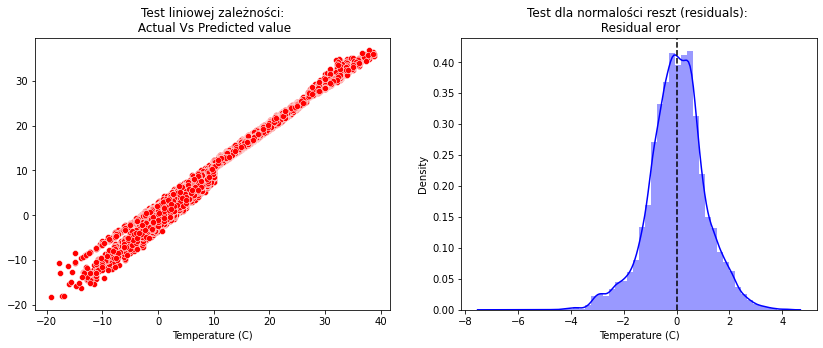

In [46]:
# Check for Linearity
f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(121)
sns.scatterplot(y_test, y_test_pred, ax=ax, color="r")
ax.set_title("Test liniowej zależności:\n Actual Vs Predicted value")

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_test_pred), ax=ax, color="b")
ax.axvline((y_test - y_test_pred).mean(), color="k", linestyle="--")
ax.set_title("Test dla normalości reszt (residuals): \n Residual eror")

Test liniowej zależności wykazuje silną zależność liniową. Test dla normalności reszt przypomina rozkład normalny. Lewy ogon rozkładu jest nieznacznie dłuższy w porównowniu do prawej strony oraz widzimy lekko rozdwojony czubek.

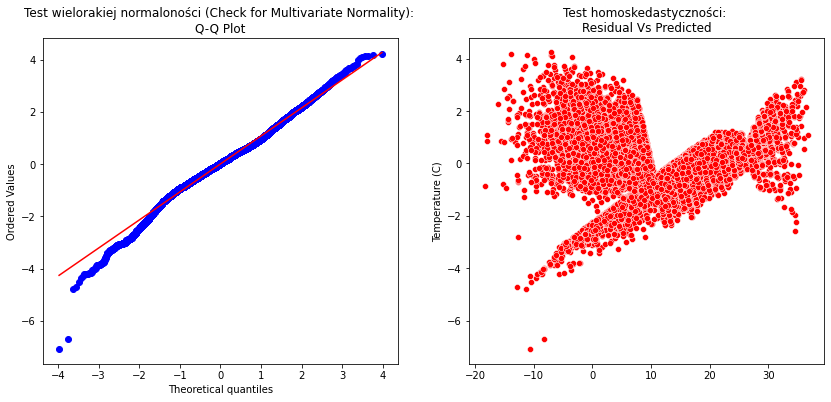

In [47]:
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_test_pred),fit=True,plot=ax[0])
ax[0].set_title('Test wielorakiej normaloności (Check for Multivariate Normality): \nQ-Q Plot')

sns.scatterplot(y = (y_test - y_test_pred), x= y_test_pred, ax = ax[1],color='r') 
ax[1].set_title('Test homoskedastyczności: \nResidual Vs Predicted');

Test wielorakiej normalności wyraźnie wskazuje na odchylenie lewego ogonu rozkładu od krzywej regresji oraz lekkie odchylenie  wartości z prawej strony ogona rozkładu.